We can try to see if the data from the club is recorded well and if we can find anything interesting in it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import pandas
import mne

In [3]:
#here are all the datatypes that might be associated with emotion (in my opinion, the other ones are likely irrelevant (accelerometer etc.))
types = ("EA","EL","PI","PR","PG","T1","SA","SR","SF","HR")
types2 = ("Electrodermal Activity", "Electrodermal Level", "PPG Infared", "PPG Red", "PPG Green", "Temperature", "SCR Amplitude", "SCR Rise Time", "SCR Frequency", "Heart Rate")
#the p-value for attempting to seperate the results by each datatype
results = []
#array for all the mean vectors
m_store = np.zeros((10,10))

for j in range(10):    
#dictionary of all the raw electrodermal activity for the club members
    raw = {}

    measure = types[j] # i am doing this to make it easier to change measure latter

    #note, these paths only work 
    paths = [
    r"..\Club Data\Tiffany Angry Parsed\Tiffany - Angry Emotibit Data_"+measure+".csv",
    r"..\Club Data\Ali Angry Parsed\Ali - Angry Emotibit Data_"+measure+".csv",
    r"..\Club Data\Nabil Angry Parsed\Nabil Emotibit - Angry_"+measure+".csv",
    r"..\Club Data\Starr Angry Parsed\Starr - Angry Emotibit Data_"+measure+".csv",
    r"..\Club Data\Daniel Angry Parsed\Daniel Angry Emotibit Data_"+measure+".csv",

    r"..\Club Data\Tiffany Happy Parsed\Tiffany - Happy Emotibit Data_"+measure+".csv",
    r"..\Club Data\Ali Happy Parsed\Ali - Happy Emotibit Data_"+measure+".csv",
    r"..\Club Data\Nabil Happy Parsed\Nabil Emotibit - Happy_"+measure+".csv",
    r"..\Club Data\Starr Happy Parsed\Starr - Happy Emotibit Data_"+measure+".csv",
    r"..\Club Data\Daniel Happy Parsed\Daniel - Happy Emotibit Data_"+measure+".csv"        
    ]

    for i in range(len(paths)):
        raw[i] = np.genfromtxt(paths[i], delimiter=',')

    means = []
    for i in range(len(paths)):
        means.append(np.mean(raw[i][1:,7]))
        if j==9:
            print(np.mean(raw[i][1:,7]))

    test = ss.wilcoxon(means[0:5],means[5:])
    
    results.append(test[1])

    m_store[j] = means

print(results)

    #plt.scatter(means,np.ones(6),c=c)

77.15789473684211
74.54077253218884
64.02325581395348
82.38333333333334
57.81707317073171
73.12121212121212
68.43722943722943
60.73809523809524
55.359550561797754
42.1875
[0.8125, 1.0, 0.8125, 1.0, 0.4375, 0.4375, 0.125, 0.625, 0.8125, 0.0625]


We can see that there is a conserved increase in heart rate when looking at angry datasets vs happy ones. This would hopefully only get more true with more data. 

Text(0.5, 1.0, '0.25')

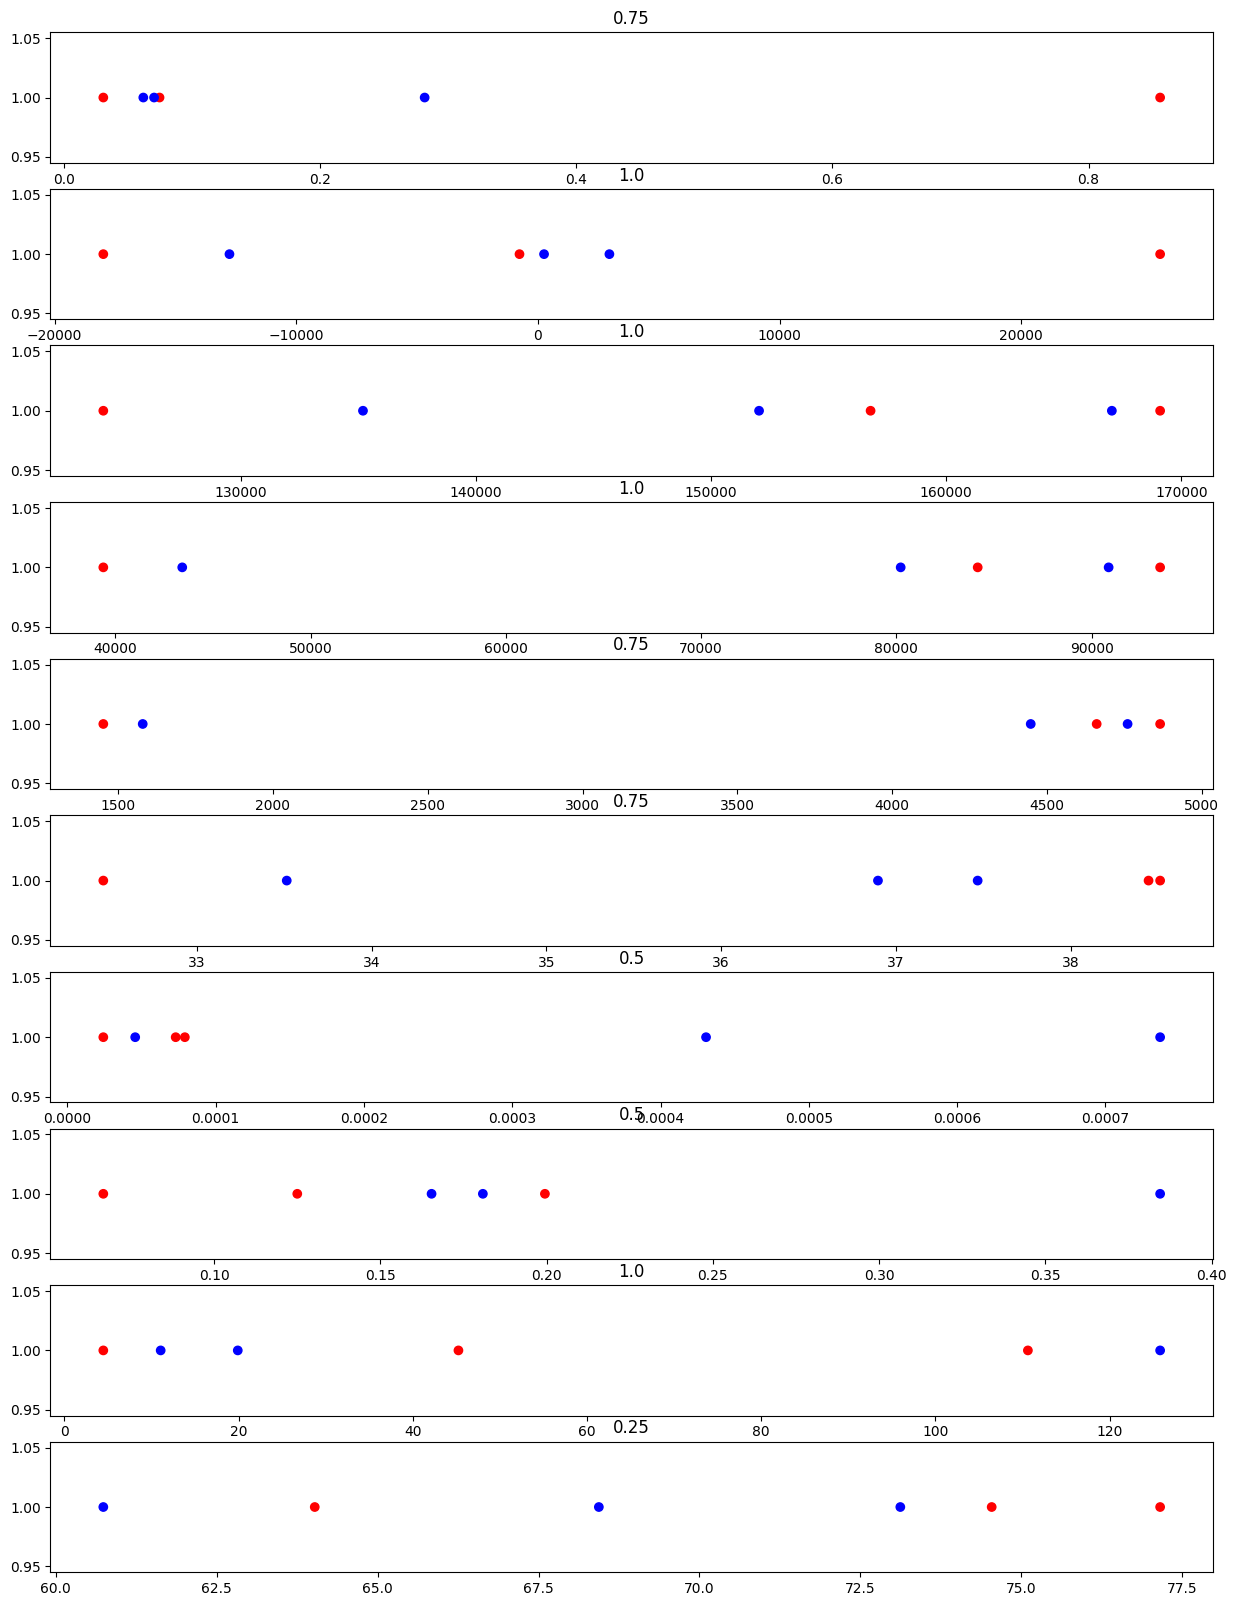

In [4]:
fig, axs = plt.subplots(10)
fig.set_figheight(20)
fig.set_figwidth(15)

axs[0].scatter(m_store[0],np.ones(6),c=['red','red','red','blue','blue','blue'])
axs[0].set_title(str(results[0]))


axs[1].scatter(m_store[1],np.ones(6),c=['red','red','red','blue','blue','blue'])
axs[1].set_title(str(results[1]))
axs[2].scatter(m_store[2],np.ones(6),c=['red','red','red','blue','blue','blue'])
axs[2].set_title(str(results[2]))
axs[3].scatter(m_store[3],np.ones(6),c=['red','red','red','blue','blue','blue'])
axs[3].set_title(str(results[3]))
axs[4].scatter(m_store[4],np.ones(6),c=['red','red','red','blue','blue','blue'])
axs[4].set_title(str(results[4]))
axs[5].scatter(m_store[5],np.ones(6),c=['red','red','red','blue','blue','blue'])
axs[5].set_title(str(results[5]))
axs[6].scatter(m_store[6],np.ones(6),c=['red','red','red','blue','blue','blue'])
axs[6].set_title(str(results[6]))
axs[7].scatter(m_store[7],np.ones(6),c=['red','red','red','blue','blue','blue'])
axs[7].set_title(str(results[7]))
axs[8].scatter(m_store[8],np.ones(6),c=['red','red','red','blue','blue','blue'])
axs[8].set_title(str(results[8]))
axs[9].scatter(m_store[9],np.ones(6),c=['red','red','red','blue','blue','blue'])
axs[9].set_title(str(results[9]))


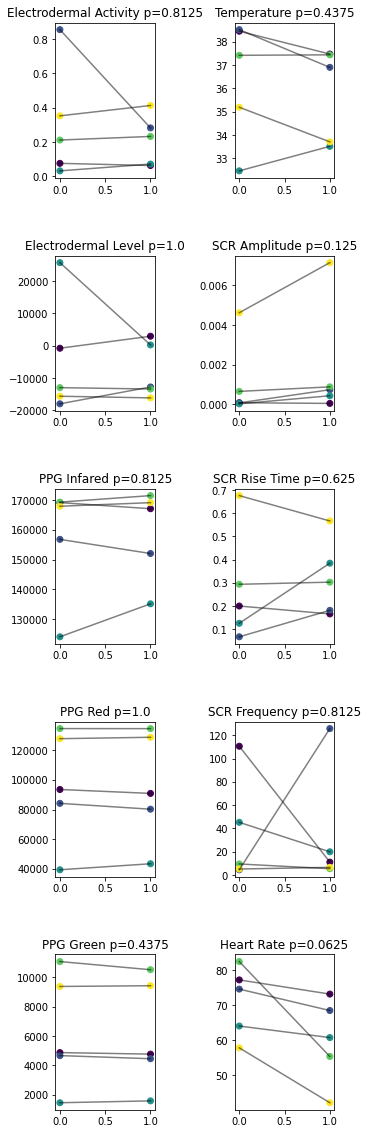

In [5]:
fig, axs = plt.subplots(5,2)
fig.set_figheight(20)
fig.set_figwidth(5)
plt.subplots_adjust(hspace=0.5,wspace=0.8)

for i in range(5):
    befores = m_store[i,0:5]
    afters = m_store[i,5:]
    axs[i,0].scatter(np.zeros(len(befores)), befores,c=[1,2,3,4,5])
    axs[i,0].scatter(np.ones(len(afters)), afters,c=[1,2,3,4,5])

    # plotting the lines
    for k in range(len(befores)):
        axs[i,0].plot( [0,1], [befores[k], afters[k]], c='k',alpha=0.5)
    
    axs[i,0].set_title(types2[i]+" p=" +str(results[i]))

for i in range(5):
    befores = m_store[i+5,0:5]
    afters = m_store[i+5,5:]
    axs[i,1].scatter(np.zeros(len(befores)), befores,c=[1,2,3,4,5])
    axs[i,1].scatter(np.ones(len(afters)), afters,c=[1,2,3,4,5])

    # plotting the lines
    for k in range(len(befores)):
        axs[i,1].plot( [0,1], [befores[k], afters[k]], c='k',alpha=0.5)
    
    axs[i,1].set_title(types2[i+5]+" p=" +str(results[i+5]))



Creating RawArray with float64 data, n_channels=6, n_times=44960
    Range : 0 ... 44959 =      0.000 ...   175.621 secs
Ready.
Creating RawArray with float64 data, n_channels=6, n_times=44968
    Range : 0 ... 44967 =      0.000 ...   175.652 secs
Ready.
Creating RawArray with float64 data, n_channels=6, n_times=75817
    Range : 0 ... 75816 =      0.000 ...   296.156 secs
Ready.
Creating RawArray with float64 data, n_channels=6, n_times=44956
    Range : 0 ... 44955 =      0.000 ...   175.605 secs
Ready.
Creating RawArray with float64 data, n_channels=6, n_times=44948
    Range : 0 ... 44947 =      0.000 ...   175.574 secs
Ready.
Creating RawArray with float64 data, n_channels=6, n_times=44952
    Range : 0 ... 44951 =      0.000 ...   175.590 secs
Ready.
Creating RawArray with float64 data, n_channels=6, n_times=44956
    Range : 0 ... 44955 =      0.000 ...   175.605 secs
Ready.
Creating RawArray with float64 data, n_channels=6, n_times=75855
    Range : 0 ... 75854 =      0.000 ..

C:\Users\Jacob\AppData\Local\Temp\ipykernel_6508\1490204576.py:27: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  recording.plot_psd(picks=["AF7","AF8","TP9","TP10"])


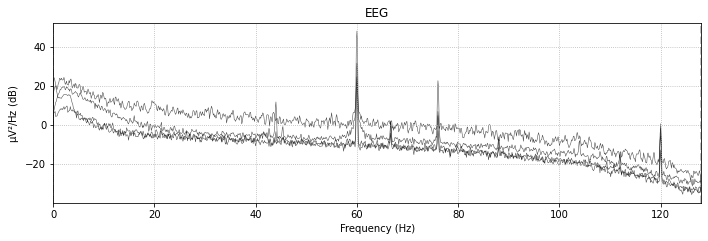

Effective window size : 8.000 (s)


C:\Users\Jacob\AppData\Local\Temp\ipykernel_6508\1490204576.py:27: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  recording.plot_psd(picks=["AF7","AF8","TP9","TP10"])


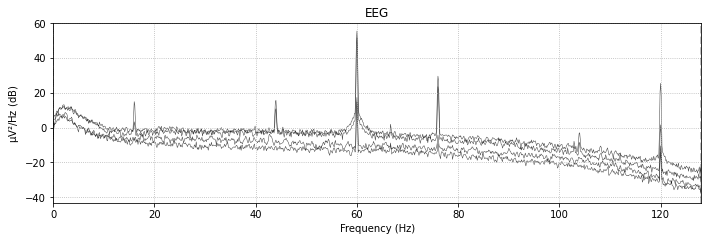

Effective window size : 8.000 (s)


C:\Users\Jacob\AppData\Local\Temp\ipykernel_6508\1490204576.py:27: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  recording.plot_psd(picks=["AF7","AF8","TP9","TP10"])


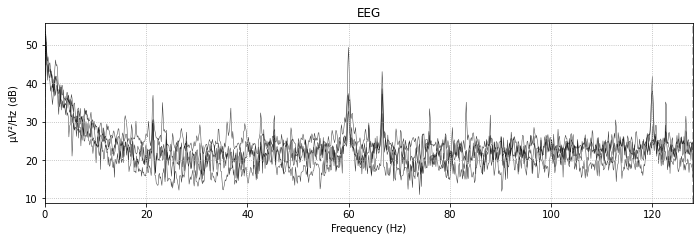

Effective window size : 8.000 (s)


C:\Users\Jacob\AppData\Local\Temp\ipykernel_6508\1490204576.py:27: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  recording.plot_psd(picks=["AF7","AF8","TP9","TP10"])


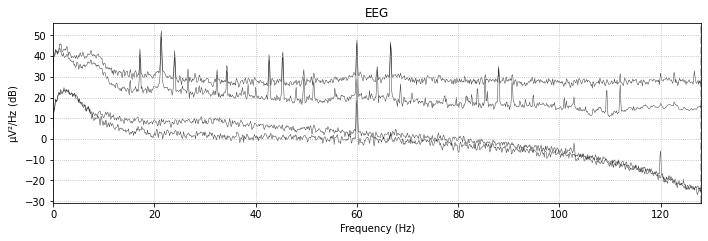

Effective window size : 8.000 (s)


C:\Users\Jacob\AppData\Local\Temp\ipykernel_6508\1490204576.py:27: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  recording.plot_psd(picks=["AF7","AF8","TP9","TP10"])


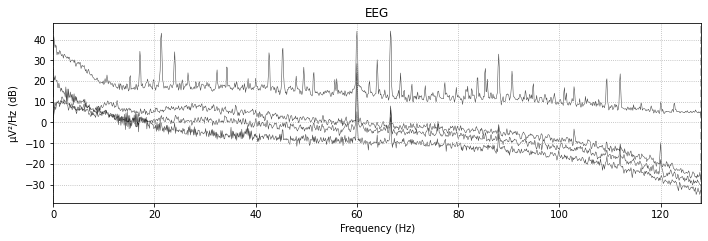

Effective window size : 8.000 (s)


C:\Users\Jacob\AppData\Local\Temp\ipykernel_6508\1490204576.py:27: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  recording.plot_psd(picks=["AF7","AF8","TP9","TP10"])


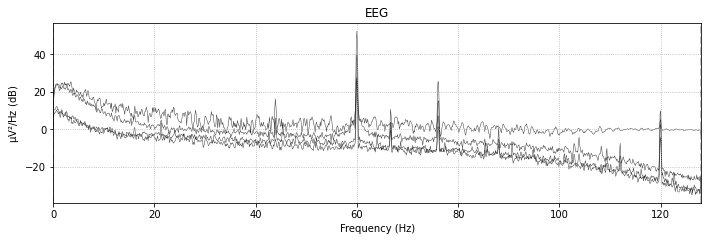

Effective window size : 8.000 (s)


C:\Users\Jacob\AppData\Local\Temp\ipykernel_6508\1490204576.py:27: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  recording.plot_psd(picks=["AF7","AF8","TP9","TP10"])


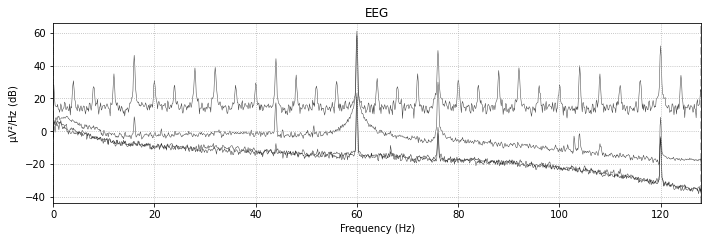

Effective window size : 8.000 (s)


C:\Users\Jacob\AppData\Local\Temp\ipykernel_6508\1490204576.py:27: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  recording.plot_psd(picks=["AF7","AF8","TP9","TP10"])


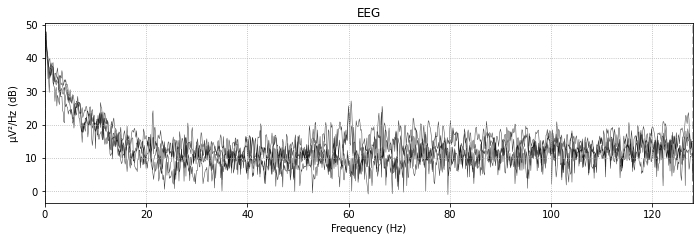

Effective window size : 8.000 (s)


C:\Users\Jacob\AppData\Local\Temp\ipykernel_6508\1490204576.py:27: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  recording.plot_psd(picks=["AF7","AF8","TP9","TP10"])


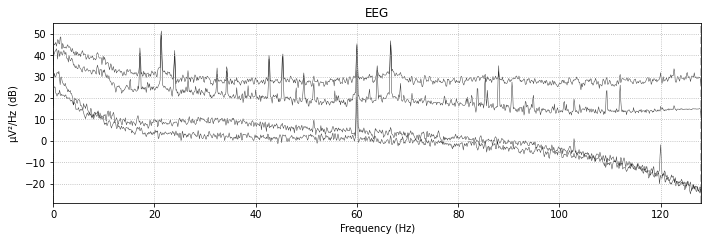

Effective window size : 8.000 (s)


C:\Users\Jacob\AppData\Local\Temp\ipykernel_6508\1490204576.py:27: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  recording.plot_psd(picks=["AF7","AF8","TP9","TP10"])


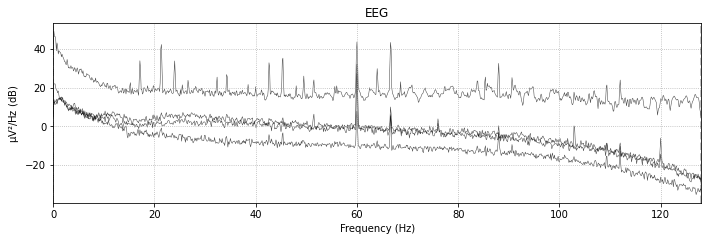

In [2]:
#all of the paths for our muse data, relative to this file
paths = [
    r"..\Club Data\Tiffany - Angry Muse Data.csv",
    r"..\Club Data\Ali - Angry Muse Data.csv",
    r"..\Club Data\Nabil - Angry Muse Data.csv",
    r"..\Club Data\Starr - Angry Muse Data.csv",
    r"..\Club Data\Daniel - Angry Muse Data.csv",
    r"..\Club Data\Tiffany - Happy Muse Data.csv",
    r"..\Club Data\Ali - Happy Muse Data.csv",
    r"..\Club Data\Nabil - Happy Muse Data.csv",    
    r"..\Club Data\Starr - Happy Muse Data.csv",    
    r"..\Club Data\Daniel - Happy Muse Data.csv"    
]

#here is the info required for MNE, note that the sampling frequency has been updated to match the muse (256) and that the channel names also match the muse
info = mne.create_info(["timestamps","TP9","AF7","AF8", "TP10", "Right AUX"], 256, ch_types="eeg")

#array of all the pandas dataframes that hold our muse data
muse_raw = []
for path in paths:
    #read the file into a pandas df
    x = pandas.read_csv(path)
    #transform into an MNE array and add to our list
    muse_raw.append(mne.io.RawArray(x.values.T/1000000, info))

for recording in muse_raw:
    recording.plot_psd(picks=["AF7","AF8","TP9","TP10"])